In [4]:
!pip install NRCLex

In [28]:
import pandas as pd
import nltk # for the sentiment analysis
from nltk.corpus import stopwords # to focus more on the essential words
import re # loads Regural Expressions for data cleaning
from sklearn.feature_extraction.text import TfidfVectorizer # converts text to numerical vector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nrclex import NRCLex
import matplotlib.pyplot as plt

print("Setup complete")

Setup complete


## 1) Loading and exploring the dataset

In [7]:
# dataset loading
df = pd.read_csv("Reviews.csv")

# checking if there's missing values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
# Taking only the text and score column
df = df[['Text', 'Score']]

# mapping rating into sentiment
def get_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

df['Sentiment']=df['Score'].apply(get_sentiment)
print(df['Sentiment'].value_counts())

Sentiment
positive    443777
negative     82037
neutral      42640
Name: count, dtype: int64


## 2) Cleaning and prepare the text 

In [10]:
stop_words = set(stopwords.words('english')) # to import the english stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text) 
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['Cleaned_Text'] = df['Text'].astype(str).apply(clean_text)

In [11]:
df.Cleaned_Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Cleaned_Text, dtype: object

## 3) Feature extraction

In [13]:
'''
Transforming the reviews to a mathematical representation to help the ML model
to unerstand and work with the text
'''
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Sentiment']

## 4) Training a classifier

In [26]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.67      0.70     16181
     neutral       0.51      0.19      0.27      8485
    positive       0.90      0.97      0.93     89025

    accuracy                           0.87    113691
   macro avg       0.72      0.61      0.64    113691
weighted avg       0.85      0.87      0.85    113691



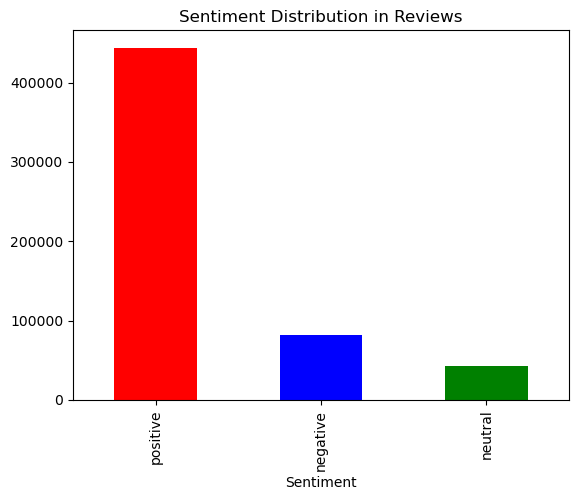

In [30]:
df['Sentiment'].value_counts().plot(kind='bar', color=['red','blue','green'])
plt.title("Sentiment Distribution in Reviews")
plt.show()